In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset
train = pd.read_csv(r'D:\MLLearning\classML\Titanic\train.csv')
test = pd.read_csv(r'D:\MLLearning\classML\Titanic\test.csv')

* Feature Engineering
* Missing Values
* One Hot Encoding...

In [6]:
# Combine the dataset
combined = pd.concat([train, test], ignore_index = True)

In [9]:
# Check the Missing Values
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [11]:
cabins = ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [12]:
train.shape, test.shape, combined.shape

((891, 12), (418, 11), (1309, 12))

In [13]:
def cabin_labels(x):
    if x in cabins:
        return("Cabin_Avbl")
    else:
        return("Missing")

In [15]:
# Lets apply this on Cabin Column..

combined["Cabin_Cat"] = combined["Cabin"].apply(cabin_labels)

In [18]:
#pd.crosstab(combined.Survived, 
            #combined.Cabin_Cat).plot(kind = "bar")


### Name

In [24]:
combined.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Cat
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Missing
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Cabin_Avbl
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Missing
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Missing
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Missing


In [28]:
titles = []
for i in combined.Name:
    titles.append(i.split(", ")[1].split(". ")[0])

In [29]:
combined["Titles"] = pd.Series(titles)

In [30]:
combined.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [31]:
titles_ignore = ['Don', 'Rev', 'Dr', 'Mme', 
                 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 
                 'the Countess','Jonkheer', 'Dona']

def notitle(x):
    if x in titles_ignore:
        return("Others")
    else:
        return(x)

In [34]:
combined["Titles"] = combined.Titles.apply(notitle)

In [35]:
combined.drop(["PassengerId", "Name", "Cabin"], axis = 1, 
              inplace = True)

### Family

In [38]:
combined["Family"] = combined.SibSp+combined.Parch+1

In [41]:
def parivar(x):
    if x==1:
        return("Solo")
    elif x==2:
        return("Duo")
    elif x<=4:
        return("Small")
    else:
        return("Large")

In [45]:
combined["Family_Cat"] = combined["Family"].apply(parivar)

### Missing Values

In [46]:
combined.groupby("Titles")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
Others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [48]:
missing_titles = combined.loc[combined.Age.isnull(), 
                              "Titles"].unique()

In [51]:
for i in missing_titles:
    combined.loc[combined.Age.isnull(), "Age"] = \
    combined.loc[combined.Titles==i, "Age"].median()

In [54]:
combined.loc[combined.Embarked.isnull(),
            "Embarked"] = combined.Embarked.mode()[0]

In [56]:
combined.loc[combined.Fare.isnull(), "Fare"] = \
combined.Fare.median()

In [59]:
# Split the data back in train and test

newtrain = combined.loc[0:train.shape[0]-1, ]

newtest = combined.loc[train.shape[0]:, ]

newtrain.shape, newtest.shape

((891, 13), (418, 13))

In [62]:
X = newtrain.drop(["Survived", "Ticket"], axis = 1)
y = newtrain.Survived.astype(int)

newtest.drop(["Survived", "Ticket"], axis = 1, inplace = True)

### Model Building

* Base Model - The first model in classification which is also known as Base model should be a prediction of 0


In [70]:
submission = pd.DataFrame({"PassengerId": test.PassengerId,
                          "Survived":0})

submission.to_csv("titanicbasemodel.csv", index = False) # 62%

In [69]:
cd

C:\Users\IT


In [72]:
# dummify the data
newX = pd.get_dummies(X, drop_first = True)
newtest = pd.get_dummies(newtest, drop_first = True)

In [74]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
pred = lg.fit(newX, y).predict(newtest)

In [75]:
submission = pd.DataFrame({"PassengerId": test.PassengerId,
                          "Survived":pred})

submission.to_csv("logistic_titanic.csv", index = False) # 76.315

### Model Metrics & Evaluation

* VIF
* Logit Model
* Interpretation of Coefficients
* Prediction using Sigmoid
* Pseudo R2
* Statistical Tests
* Deviance
* AIC


In [79]:
import statsmodels.api as sma

model = sma.Logit(y, newX).fit()
model.summary()

         Current function value: 0.397365
         Iterations: 35


C:\Users\IT\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      873
Method:                           MLE   Df Model:                           17
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.4033
Time:                        11:50:41   Log-Likelihood:                -354.05
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.198e-91
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass               -0.8026      0.187     -4.292      0.000      -1.169      -0.436
Age                  -0.0234      0.009     -2.505      0.012      -0.042      -0.005
SibSp               -30.2490   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Parch               -30.1413   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Fare                  0.0034      0.003      1.314      0.189      -0.002       0.009
Family               30.1692   1.27e+05      0.000      1.000   -2.48e+05    2.48e+05
Sex_male            -25.4242   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Embarked_Q            0.0330      0.401      0.082      0.935      -0.754       0.819
Embarked_S           -0.3189      0.254     -1.256      0.209      -0.816       0.179
Cabin_Cat_Missing    -0.6404      0.322     -1.991      0.047      -1.271      -0.010
Titles_Miss         -26.0898   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Titles_Mr            -3.5874      0.598     -6.003      0.000      -4.759      -2.416
Titles_Mrs          -25.4100   1.27e+05     -0.000      1.000   -2.48e+05    2.48e+05
Titles_Ms           -10.4748   1.27e+05  -8.26e-05      1.000   -2.49e+05    2.49e+05
Titles_Others        -3.5582      0.824     -4.316      0.000      -5.174      -1.942
Family_Cat_Large     -2.5015      1.291     -1.937      0.053      -5.032       0.029
Family_Cat_Small      0.1452      0.500      0.291      0.771      -0.834       1.125
Family_Cat_Solo       0.3804      0.391      0.972      0.331      -0.387       1.148
=====================================================================================
"""

### Basic Inference on the Output

* There are lot of features which have a very high PValue which indicates that the features are statistically insignificant.

* This also indicates that there is lot of Multicollinearity between the Categorical Predictors.

* Warning also suggests that the model is not a good model because MLE could not help converge the Sigmoid Curve

In [83]:
# VIF for Multicollinearity Check..
from statsmodels.stats.outliers_influence import \
variance_inflation_factor

vif = []
for i in range(newX.shape[1]):
    vif.append(variance_inflation_factor(newX.values, i))
    

In [85]:
pd.DataFrame(vif, columns = ["Value"], index = newX.columns).\
sort_values(ascending = False, by = "Value")

,Value
Family,1541.844876
SibSp,386.127423
Parch,208.163779
Sex_male,45.570269
Titles_Miss,38.104557
Titles_Mrs,29.624656
Titles_Mr,8.477798
Family_Cat_Large,8.368818
Family_Cat_Solo,3.209859
Family_Cat_Small,2.982278


In [86]:
# SIPSP, PARCH Sex_male
subset = newX.drop(["SibSp", "Parch", "Sex_male"], axis = 1)

In [87]:
# lets rebuild the Model
model = sma.Logit(y, subset).fit()

model.summary()

         Current function value: 0.421190
         Iterations: 35


C:\Users\IT\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           14
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3675
Time:                        12:09:46   Log-Likelihood:                -375.28
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.084e-84
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass               -0.2969      0.168     -1.773      0.076      -0.625       0.031
Age                  -0.0131      0.009     -1.504      0.133      -0.030       0.004
Fare                  0.0097      0.003      3.240      0.001       0.004       0.016
Family                0.5728      0.170      3.372      0.001       0.240       0.906
Embarked_Q            0.1156      0.394      0.293      0.769      -0.657       0.888
Embarked_S           -0.0706      0.241     -0.293      0.769      -0.542       0.401
Cabin_Cat_Missing    -0.7748      0.314     -2.468      0.014      -1.390      -0.159
Titles_Miss           0.8299      0.449      1.847      0.065      -0.051       1.711
Titles_Mr            -1.9628      0.468     -4.195      0.000      -2.880      -1.046
Titles_Mrs            1.5941      0.507      3.145      0.002       0.601       2.587
Titles_Ms            21.3221   4.64e+04      0.000      1.000   -9.09e+04    9.09e+04
Titles_Others        -1.0974      0.632     -1.736      0.082      -2.336       0.141
Family_Cat_Large     -5.0538      1.047     -4.825      0.000      -7.107      -3.001
Family_Cat_Small     -0.0480      0.396     -0.121      0.903      -0.823       0.727
Family_Cat_Solo       1.2741      0.321      3.971      0.000       0.645       1.903
=====================================================================================
"""

##### Lets Remove the High PValues

In [89]:
feats =[]

for i in model.pvalues:
    if i <0.05:
        feats.append(model.pvalues.index)
    

In [96]:
localdf = pd.DataFrame(model.pvalues, 
                       columns = ["Pvalue"]).reset_index()

In [105]:
feats = list(localdf.loc[localdf["Pvalue"]<0.05, "index"])

In [106]:
# Model of imp feats
newfeats = subset.loc[:, feats]

model = sma.Logit(y, newfeats).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.434542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3474
Time:                        12:18:29   Log-Likelihood:                -387.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.329e-86
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fare                  0.0109      0.003      4.200      0.000       0.006       0.016
Family                0.4258      0.098      4.363      0.000       0.235       0.617
Cabin_Cat_Missing    -0.9245      0.232     -3.977      0.000      -1.380      -0.469
Titles_Mr            -2.5722      0.203    -12.698      0.000      -2.969      -2.175
Titles_Mrs            0.8667      0.293      2.958      0.003       0.292       1.441
Family_Cat_Large     -4.4873      0.639     -7.018      0.000      -5.740      -3.234
Family_Cat_Solo       0.9603      0.219      4.387      0.000       0.531       1.389
=====================================================================================
"""

### Predict the Output using Sigmoid

In [113]:
model.params

Fare                 0.010875
Family               0.425778
Cabin_Cat_Missing   -0.924455
Titles_Mr           -2.572236
Titles_Mrs           0.866743
Family_Cat_Large    -4.487282
Family_Cat_Solo      0.960324
dtype: float64

In [111]:
newtest.loc[:, feats].head(1)

,Fare,Family,Cabin_Cat_Missing,Titles_Mr,Titles_Mrs,Family_Cat_Large,Family_Cat_Solo
891,7.8292,1,1,1,0,0,1


### Equation for Prediction

* log(odds) = beta1* fare + beta2 * family+beta3*cabin_cat_missing+.....

In [115]:
logit = model.params[0]*newtest["Fare"]+model.params[1]*\
newtest["Family"]+model.params[2]*newtest["Cabin_Cat_Missing"]+\
model.params[3]*newtest["Titles_Mr"]+\
model.params[4]*newtest["Titles_Mrs"]+\
model.params[5]*newtest["Family_Cat_Large"]+\
model.params[6]*newtest["Family_Cat_Solo"]

In [124]:
prob = 1/(1+np.exp(-logit)) # 0.116557
print("Prob using Sigmoid: ", pd.DataFrame(prob).head(1))
direct = model.predict(newtest.loc[:, feats].head(1))
print("Direct Function", direct)

Prob using Sigmoid:              0
891  0.116557
Direct Function 891    0.116557
dtype: float64


#### Interpretation of Coefficients

In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3474
Time:                        12:58:05   Log-Likelihood:                -387.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.329e-86
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fare                  0.0109      0.003      4.200      0.000       0.006       0.016
Family                0.4258      0.098      4.363      0.000       0.235       0.617
Cabin_Cat_Missing    -0.9245      0.232     -3.977      0.000      -1.380      -0.469
Titles_Mr            -2.5722      0.203    -12.698      0.000      -2.969      -2.175
Titles_Mrs            0.8667      0.293      2.958      0.003       0.292       1.441
Family_Cat_Large     -4.4873      0.639     -7.018      0.000      -5.740      -3.234
Family_Cat_Solo       0.9603      0.219      4.387      0.000       0.531       1.389
=====================================================================================
"""

In [138]:
np.exp(-4.4873) # Increase of Odds

# By an increase of 1 family member, the odds of their survival
# decrease of 1.1%.

# This means that the increase of family member is negatively
# correlated with the Survival of Passengers...


0.011250980483955841

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()

gbm.fit(newX, y)

GradientBoostingClassifier()

<AxesSubplot:>

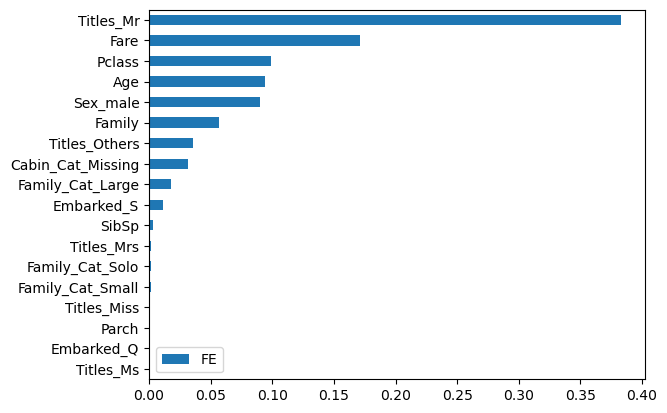

In [130]:
pd.DataFrame(gbm.feature_importances_, columns =["FE"], 
             index = newX.columns).sort_values(by  ="FE", ascending = True).plot(kind = "barh")

In [132]:
model.params

Fare                 0.010875
Family               0.425778
Cabin_Cat_Missing   -0.924455
Titles_Mr           -2.572236
Titles_Mrs           0.866743
Family_Cat_Large    -4.487282
Family_Cat_Solo      0.960324
dtype: float64

### Pseudo R2

* **McFadden R2** - Here, the R2 is not similar to the Linear Regression. There in we interpret the R2 as the ratio of variance in Y explained by X.

* Because the variance in Y is not explained by X in Logistic Regression however, R2 exists and therefore it is called Pseudo R2.

* Therefore, McFadden R2 is calculated by taking Log of (LL_full/LL_null). This is 1 - (LLF/LLN)

* Note: The value of McFadden R2 will be in the range of 0 and 1.
* Here, **0 represents that the model has no explanatory power where as 1 represents the model has a very high explanatory power.**

* The range of McFadden is 0.2 to 0.4. Generally if the model has the R2 falling in this range then we can say the model is good.

In [142]:
# McFadden
mcfadden = 1 - (model.llf/model.llnull)
print("McFadden R2: ", mcfadden)

McFadden R2:  0.3474488787775447


In [150]:
# Cox and Snell

L0 = np.exp(model.llnull)
L1 = np.exp(model.llf)

cox_snell = 1 - (L0/L1) ** (2/newX.shape[0])

In [152]:
# Nagelkerke
nagelkerke = cox_snell/(1 - L0**(2/newX.shape[0]))

print("McFadden: ", mcfadden)
print("Cox & Snell: ", cox_snell)
print("Nagelkerke: ", nagelkerke)

McFadden:  0.3474488787775447
Cox & Snell:  0.37044416823032167
Nagelkerke:  0.5033176723723485


### Which one to go with?

* Mcfadden is generally a conservative estimate.
* Cox and Snell is used to compare the nested models and thus it carries lot of reference there. Because the value of R2 is adjusted on the basis of n.

* Nagelkerke is based on Cox and Snell but it is more better estimate because it can easily achieve values closer to 1 (not really) but it is the highest R2 amongst all. 

* Therefore, Nagelkerke is the goto R2 value for the model.


### AIC

In [153]:
model.aic

788.3531401238849

In [157]:
# Wald test
# model.bse represents standard error
teststats = model.params[0]/model.bse[0]
teststats

# Pvalue
# Since the LogReg Model follows Chi Square Distt...

import scipy.stats as stats
stats.chi2.sf(teststats, 1) # Wald Test has df of 1


0.040433708686825026